In [67]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

Trade(uid='2', tags=[Tag(timestamp=None, key='taken', value=True), Tag(timestamp=None, key='account', value='mt5_vantage'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-18 14:10:00')), Tag(timestamp=None, key='entry_price', value=2914.03), Tag(timestamp=None, key='sl_price', value=2910.94), Tag(timestamp=None, key='tp_price', value=3000.0), Tag(timestamp=None, key='SL_distance', value=3.0900000000001455), Tag(timestamp=None, key='TP_distance', value=85.9699999999998), Tag(timestamp=None, key='side', value='long')], execution_type='actual')
Trade(uid='4', tags=[Tag(timestamp=None, key='account', value='ideal'), Tag(timestamp=None, key='entry_time', value=Timestamp('2025-02-22 15:11:00')), Tag(timestamp=None, key='entry_price', value=22164.4), Tag(timestamp=None, key='sl_price', value=22179.09), Tag(timestamp=None, key='tp_price', value=22105.27), Tag(timestamp=None, key='close_price', value=22105.27), Tag(timestamp=None, key='SL_distance', value=-14.68999999999869), Ta

In [68]:
%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os
os.getenv('JOURNAL_ROOT')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal'

In [69]:
from src.tradecli import *
from src.utils import *
from src.journal import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [70]:
config = Config(
    include_patterns=[r'^type_1_', r'^type_3_', r'^risk_reward_ratio$', r'^side'],  
    exclude_patterns=[r'^management_strategy$'],         
    #force_values={'side': 'short', 'side': 'long'},
)

full_df = j.to_dataframe(config)
#full_df = full_df[full_df['side'] == 'long']
display(full_df)

,type_1_m15,type_1_h1,type_1_m1,type_3_w,type_3_m5,side,type_3_m1,type_1_m5,type_3_h4,type_3_d,type_3_h1,type_3_m15,type_1_d,type_1_h4,type_1_m30,type_3_M,type_1_M,type_3_m30,type_1_w
0,False,False,False,False,False,short,True,False,False,False,False,False,True,False,False,False,False,False,False
1,False,True,False,False,True,short,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,short,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,short,True,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,short,False,False,False,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,short,False,False,False,False,False,False,False,False,False,True,True,False,False
6,False,False,True,True,False,long,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,short,False,False,False,False,True,False,False,False,True,False,False,False,False
8,False,True,False,False,False,long,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,True,False,False,long,False,False,False,False,False,False,False,False,False,False,False,True,False


In [71]:
j.to_dataframe()

,trade_uid,type_2_m15,type_2_m5,type_2_M,initial_risk_reward,account,SL_distance,type_1_m15,taken,type_1_h1,entry_price,type_1_m1,type_3_w,type_3_m5,return,side,type_3_m1,type_2_d,potential_return,unit_test,tp_price,type_2_m30,numerical_confidence,type_2_h4,initial_return,type_1_m5,outcome,type_3_h4,session,potential_risk_reward,poi_1h_mitigation,type_3_d,poi_1m_liquidity_grab,poi,type_3_h1,poi_1h_liquidity_grab,poi_15m_mitigation,type_3_m15,sl_price,type_1_d,type_1_h4,type_2_h1,htf_poi_ltf_confirmation,TP_distance,type_1_m30,type_2_w,poi_1h_sc,type_3_M,potential_price,poi_1m_mitigation,type_2_m1,rr,type_1_M,poi_15m_liquidity_grab,poi_15m_sc,type_3_m30,entry_time,poi_1m_sc,management_strategy,close_price,type_1_w,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_no_management,outcome_be,outcome_loss,outcome_win
0,1005,False,False,False,4.644407,test_account,-0.005,False,False,False,1.1204,False,False,False,0.00525,short,True,True,NaN,True,1.097178,False,5.0,False,-0.023222,False,loss,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1254,True,False,False,True,-0.023222,False,False,False,False,NaN,False,False,-1.050000,False,False,False,False,2025-02-03 21:51:12.119744653,False,be_after_1r,1.12565,False,False,True,True,False,False,False,True,False
1,1006,True,False,False,9.885333,test_account,-0.005,False,False,True,1.1347,False,False,True,-0.03525,short,False,False,NaN,True,1.085273,False,1.0,False,-0.049427,False,win,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1397,False,False,False,True,-0.049427,False,False,False,False,NaN,False,False,7.050000,False,False,False,False,2025-02-01 21:17:49.926870266,False,be_after_push,1.09945,False,False,True,False,True,False,False,False,True
2,1007,False,False,True,6.497983,test_account,-0.005,False,False,False,1.1242,False,False,True,0.00025,short,False,False,NaN,True,1.091710,False,1.0,False,-0.032490,False,be,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1292,False,False,False,False,-0.032490,False,False,False,False,NaN,False,False,-0.050000,False,False,False,False,2025-02-06 22:57:07.985216776,False,no_management,1.12445,True,True,False,False,False,True,True,False,False
3,1008,False,False,False,3.195198,test_account,-0.005,False,False,False,1.1345,False,False,False,-0.04350,short,True,True,NaN,True,1.118524,False,2.0,False,-0.015976,True,win,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1395,False,False,False,True,-0.015976,False,False,False,False,NaN,False,False,8.700000,False,False,False,False,2025-02-21 22:41:24.634215755,False,be_after_1r,1.09100,False,False,True,True,False,False,False,False,True
4,1009,False,False,False,8.875786,test_account,-0.005,False,False,False,1.1132,False,False,True,0.00385,short,False,False,NaN,True,1.068821,False,1.0,False,-0.044379,False,loss,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1182,False,False,False,False,-0.044379,False,True,False,False,NaN,False,False,-0.770000,True,False,False,False,2025-02-09 22:11:34.133313206,False,be_after_push,1.11705,False,True,False,False,True,False,False,True,False
5,1010,False,False,False,1.824689,test_account,-0.005,False,False,False,1.1335,False,False,False,0.00510,short,False,False,NaN,True,1.124377,True,2.0,False,-0.009123,False,loss,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1385,False,False,False,True,-0.009123,False,False,False,True,NaN,False,False,-1.020000,True,False,False,False,2025-02-01 22:18:57.940630837,False,be_after_1r,1.13860,False,False,True,True,False,False,False,True,False
6,1011,False,False,False,8.890933,test_account,0.005,False,False,False,1.1128,True,True,False,-0.00120,long,False,False,NaN,True,1.157255,False,5.0,False,0.044455,False,loss,False,tokyo,NaN,False,False,False,None,False,False,False,False,1.1078,False,False,True,False,0.044455,False,False,False,False,NaN,False,False,-0.240

In [53]:
!rm -rf output
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
j.to_markdown(output_dir='output',)

TypeError: unhashable type: 'list'

In [ ]:
df = j.to_dataframe(config=None)
df

,trade_uid,type_2_m15,type_2_m5,type_2_M,initial_risk_reward,account,SL_distance,type_1_m15,taken,type_1_h1,entry_price,type_1_m1,type_3_w,type_3_m5,return,side,type_3_m1,type_2_d,unit_test,tp_price,type_2_m30,numerical_confidence,type_2_h4,initial_return,type_1_m5,outcome,type_3_h4,session,type_3_d,type_3_h1,type_3_m15,sl_price,type_1_d,type_1_h4,type_2_h1,htf_poi_ltf_confirmation,TP_distance,type_1_m30,type_2_w,type_3_M,type_2_m1,rr,type_1_M,type_3_m30,entry_time,management_strategy,close_price,type_1_w,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_no_management,outcome_be,outcome_loss,outcome_win
0,1005,False,False,False,4.644407,test_account,-0.005,False,False,False,1.1204,False,False,False,0.00525,short,True,True,True,1.097178,False,5.0,False,-0.023222,False,loss,False,tokyo,False,False,False,1.1254,True,False,False,True,-0.023222,False,False,False,False,-1.05,False,False,2025-02-01 00:01:50.983296369,be_after_1r,1.12565,False,False,True,True,False,False,False,True,False
1,1006,True,False,False,9.885333,test_account,-0.005,False,False,True,1.1347,False,False,True,-0.03525,short,False,False,True,1.085273,False,1.0,False,-0.049427,False,win,False,tokyo,False,False,False,1.1397,False,False,False,True,-0.049427,False,False,False,False,7.05,False,False,2025-01-30 00:02:44.938991687,be_after_push,1.09945,False,False,True,False,True,False,False,False,True
2,1007,False,False,True,6.497983,test_account,-0.005,False,False,False,1.1242,False,False,True,0.00025,short,False,False,True,1.091710,False,1.0,False,-0.032490,False,be,False,tokyo,False,False,False,1.1292,False,False,False,False,-0.032490,False,False,False,False,-0.05,False,False,2025-02-04 00:40:29.427081060,no_management,1.12445,True,True,False,False,False,True,True,False,False
3,1008,False,False,False,3.195198,test_account,-0.005,False,False,False,1.1345,False,False,False,-0.04350,short,True,True,True,1.118524,False,2.0,False,-0.015976,True,win,False,tokyo,False,False,False,1.1395,False,False,False,True,-0.015976,False,False,False,False,8.70,False,False,2025-02-18 23:21:08.989269207,be_after_1r,1.09100,False,False,True,True,False,False,False,False,True
4,1009,False,False,False,8.875786,test_account,-0.005,False,False,False,1.1132,False,False,True,0.00385,short,False,False,True,1.068821,False,1.0,False,-0.044379,False,loss,False,tokyo,False,False,False,1.1182,False,False,False,False,-0.044379,False,True,False,False,-0.77,True,False,2025-02-06 23:25:16.427391348,be_after_push,1.11705,False,True,False,False,True,False,False,True,False
5,1010,False,False,False,1.824689,test_account,-0.005,False,False,False,1.1335,False,False,False,0.00510,short,False,False,True,1.124377,True,2.0,False,-0.009123,False,loss,False,tokyo,False,False,False,1.1385,False,False,False,True,-0.009123,False,False,True,False,-1.02,True,False,2025-01-30 00:34:22.512682550,be_after_1r,1.13860,False,False,True,True,False,False,False,True,False
6,1011,False,False,False,8.890933,test_account,0.005,False,False,False,1.1128,True,True,False,-0.00120,long,False,False,True,1.157255,False,5.0,False,0.044455,False,loss,False,tokyo,False,False,False,1.1078,False,False,True,False,0.044455,False,False,False,False,-0.24,False,False,2025-02-16 00:25:09.428994577,be_after_1r,1.11160,False,True,False,True,False,False,False,True,False
7,1012,False,False,False,1.741357,test_account,-0.005,False,False,False,1.1280,False,False,False,-0.02430,short,False,True,True,1.119293,False,2.0,False,-0.008707,False,win,False,tokyo,False,True,False,1.1330,False,False,False,True,-0.008707,True,False,False,False,4.86,False,False,2025-02-17 00:13:46.776131411,no_management,1.10370,False,False,True,False,False,True,False,False,True
8,1013,False,True,False,3.992825,test_account,0.005,False,False,True,1.1249,False,False,False,-0.00675,long,False,False,True,1.144864,False,1.0,False,0.019964,False,loss,False,tokyo,False,False,False,1.1199,False,Fals

In [ ]:
df_test = df.copy()
features = ['type_1_m5', 'type_2_m5', 'type_3_m5', 'htf_poi_ltf_confirmation', 'return']
df_test = df_test[features]
df_test = df_test.dropna()
exptected_return = df_test['return'].mean()
print('Expected return full search space:', exptected_return)
if exptected_return > 0:
    print('Expected return is positive')
else:
    print('Expected return is negative')
df_test

display(df_test.dtypes)
display(df_test.describe())
display(df_test)


report_best_performing_tags_value(df_test, y_col='return', score_mode='mean', method='brute_force')

Expected return full search space: -0.004750000000000009
Expected return is negative


type_1_m5                       bool
type_2_m5                       bool
type_3_m5                       bool
htf_poi_ltf_confirmation    category
return                       float64
dtype: object

,return
count,10.000000
mean,-0.004750
std,0.025865
min,-0.043500
25%,-0.019912
50%,-0.000475
75%,0.004788
max,0.049050


,type_1_m5,type_2_m5,type_3_m5,htf_poi_ltf_confirmation,return
0,False,False,False,True,0.00525
1,False,False,True,True,-0.03525
2,False,False,True,False,0.00025
3,True,False,False,True,-0.04350
4,False,False,True,False,0.00385
5,False,False,False,True,0.00510
6,False,False,False,False,-0.00120
7,False,False,False,True,-0.02430
8,False,True,False,True,-0.00675
9,False,True,False,True,0.04905


Best subset: ('type_1_m5',)
Best combination: (False,)
Best score: -0.00044444444444444485
Best subset: ('type_2_m5',)
Best combination: (True,)
Best score: 0.021150000000000002
Best subset: ('type_2_m5',)
Best combination: (True,)
Best score: 0.021150000000000002


In [ ]:
import src.tradecli
cfg = src.tradecli.ReportOptunaConfig(study_name='default_1')
res = report_best_performing_tags_value(df_test, 
                                  y_col='return', 
                                  score_mode='mean', method='optuna', config=cfg)

[I 2025-02-19 14:30:42,168] A new study created in memory with name: default_1


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-02-19 14:30:42,177] Trial 0 finished with value: -0.0012000000000000899 and parameters: {'include_type_1_m5': True, 'value_type_1_m5': False, 'include_type_2_m5': True, 'value_type_2_m5': False, 'include_type_3_m5': True, 'value_type_3_m5': False, 'include_htf_poi_ltf_confirmation': True, 'value_htf_poi_ltf_confirmation': False}. Best is trial 0 with value: -0.0012000000000000899.
[I 2025-02-19 14:30:42,179] Trial 1 finished with value: -inf and parameters: {'include_type_1_m5': True, 'value_type_1_m5': False, 'include_type_2_m5': True, 'value_type_2_m5': True, 'include_type_3_m5': True, 'value_type_3_m5': True, 'include_htf_poi_ltf_confirmation': False}. Best is trial 0 with value: -0.0012000000000000899.
[I 2025-02-19 14:30:42,181] Trial 2 finished with value: -0.010383333333333336 and parameters: {'include_type_1_m5': False, 'include_type_2_m5': True, 'value_type_2_m5': False, 'include_type_3_m5': True, 'value_type_3_m5': True, 'include_htf_poi_ltf_confirmation': False}. Bes

In [ ]:
res

(<optuna.study.study.Study at 0x28d8b95b0>,
 {'include_type_1_m5': False,
  'include_type_2_m5': True,
  'value_type_2_m5': True,
  'include_type_3_m5': False,
  'include_htf_poi_ltf_confirmation': False},
 0.021150000000000002)

In [54]:
res[0].best_trial
study = res[0]

In [55]:
# visualize stuff
import optuna
import plotly
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_slice
from optuna.visualization import plot_param_importances

# disable optuna warnings
optuna.logging.set_verbosity(optuna.logging.ERROR)

plot_optimization_history(study).show()
plot_param_importances(study).show()
plot_slice(study).show()

In [56]:
!rm -rf output/studies.md
import pprint
def markdown_report_study(study:optuna.Study, output_dir='output'):
    SECTION_OPTUNA_STUDIES = '## Optuna Studies'
    SECTION_BEST_TRIAL = f'### {study.study_name} - {study.best_trial.number}'
    GENERATION_TIME = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    best_trial = study.best_trial
    best_trial_params = best_trial.params
    best_trial_value = best_trial.value
    best_trial_number = best_trial.number
    best_trial_number
    best_trial_params
    best_trial_value
    # add the params as nicely formatted json inside code block
    best_trial_params_str = f'''
```json
{pprint.pformat(best_trial_params)}
```
''' 
    
    best_trial_str = f'''
{SECTION_BEST_TRIAL}
- generation time: {GENERATION_TIME}
- best trial value: {best_trial_value}
- best trial params: {best_trial_params_str}
'''
    with open(f'{output_dir}/studies.md', 'a') as f:
        f.write(best_trial_str)

    
    # find the section or create it and add md link to the best trial in the study
    with open(f'{output_dir}/index.md', 'r') as f:
        lines = f.readlines()
        found = False
        for i, line in enumerate(lines):
            if SECTION_OPTUNA_STUDIES in line:
                found = True
                break
        if not found:
            lines.append(f'\n{SECTION_OPTUNA_STUDIES}\n')
        lines.append(f'- [[studies.md{SECTION_BEST_TRIAL}]]\n')
    with open(f'{output_dir}/index.md', 'w') as f:
        f.write(''.join(lines))
        

markdown_report_study(study, output_dir='output')

FileNotFoundError: [Errno 2] No such file or directory: 'output/index.md'

In [57]:
full_df = get_full_df()
#rename return column to return_points
full_df = full_df[full_df['account'] == 'test_account']
full_df = full_df.rename(columns={'return': 'return_points'})
print(np.sort(full_df.columns))
full_df

TypeError: unhashable type: 'list'

In [17]:
from analysis import *

perform_anova(full_df, dependent_var='return_points', independent_var='htf_poi_ltf_confirmation')

,sum_sq,df,F,PR(>F)
C(htf_poi_ltf_confirmation),0.000140,1.0,0.190524,0.674022
Residual,0.005881,8.0,NaN,NaN


## Statistics

In [18]:
calculate_performance_metrics(full_df)

Total Trades                     10.00000
Total Return                     -0.04750
Average Return                   -0.00475
Max Return Drawdown               0.07575
Total Risk Reward Ratio          25.94000
Average Risk Reward Ratio         2.59400
Max Risk Reward Ratio             9.81000
Min Risk Reward Ratio            -1.35000
Win Rate (%)                      0.40000
Average Win RR                    7.60500
Max Win RR                        9.81000
Min Win RR                        4.86000
Loss Rate (%)                     0.50000
Average Loss RR                  -0.88600
Max Loss RR                      -1.35000
Min Loss RR                      -0.24000
Breakeven Trades                  1.00000
Breakeven Rate (%) (|rr|<0.2)     0.10000
dtype: float64

Index(['trade_uid', 'type_2_m15', 'type_2_m5', 'type_2_M',
       'initial_risk_reward', 'account', 'SL_distance', 'type_1_m15', 'taken',
       'type_1_h1', 'entry_price', 'type_1_m1', 'type_3_w', 'type_3_m5',
       'return', 'side', 'type_3_m1', 'type_2_d', 'unit_test', 'tp_price',
       'type_2_m30', 'numerical_confidence', 'type_2_h4', 'initial_return',
       'type_1_m5', 'outcome', 'type_3_h4', 'session', 'type_3_d', 'type_3_h1',
       'type_3_m15', 'sl_price', 'type_1_d', 'type_1_h4', 'type_2_h1',
       'htf_poi_ltf_confirmation', 'TP_distance', 'type_1_m30', 'type_2_w',
       'type_3_M', 'type_2_m1', 'rr', 'type_1_M', 'type_3_m30', 'entry_time',
       'management_strategy', 'close_price', 'type_1_w',
       'htf_poi_ltf_confirmation_False', 'htf_poi_ltf_confirmation_True',
       'management_strategy_be_after_1r', 'management_strategy_be_after_push',
       'management_strategy_no_management', 'outcome_be', 'outcome_loss',
       'outcome_win'],
      dtype='object')

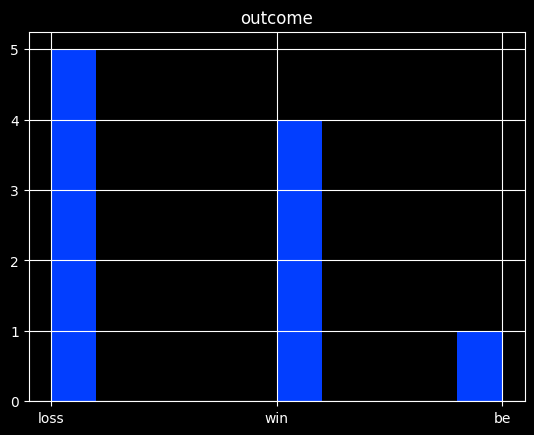

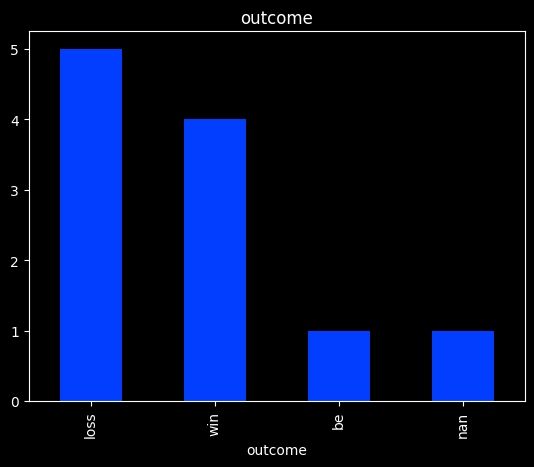

outcome
loss    5
win     4
be      1
NaN     1
Name: count, dtype: int64


10    2
Name: trade_uid, dtype: object

In [48]:
import journal as jo
df=df.copy()
df[df['account'] == jo.ACC_MT5_VANTAGE]
display(df.columns)

def plot_hist_all_values_col(df, col):
    df[col].hist()
    plt.title(col)
    plt.show()
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(col)
    plt.show()
    print(df[col].value_counts(dropna=False))

plot_hist_all_values_col(df, 'outcome')

# trade_uids for the NaN values of certain column
def get_trades_col_nan(df, col):
    return df[df[col].isna()]['trade_uid']

get_trades_col_nan(df, 'outcome')

## Packages: Analysis examples

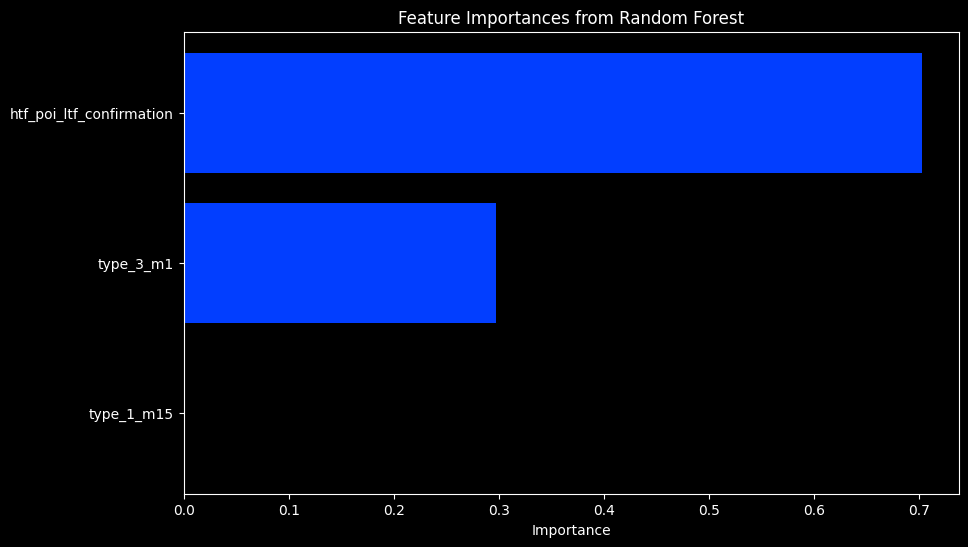

In [731]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = full_df[['type_3_m1', 'type_1_m15', 'htf_poi_ltf_confirmation']]
y = full_df['outcome']

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()

plt.show()

type_3_m1     0.2
type_1_m15    0.0
type_1_m5     0.1
dtype: float64
    type_3_m1  type_1_m15  type_1_m5
4         0.8         0.0       -0.1
5        -0.2         0.0       -0.1
6        -0.2         0.0       -0.1
7         0.8         0.0        0.9
8        -0.2         0.0       -0.1
9        -0.2         0.0       -0.1
10       -0.2         0.0       -0.1
11       -0.2         0.0       -0.1
12       -0.2         0.0       -0.1
13       -0.2         0.0       -0.1


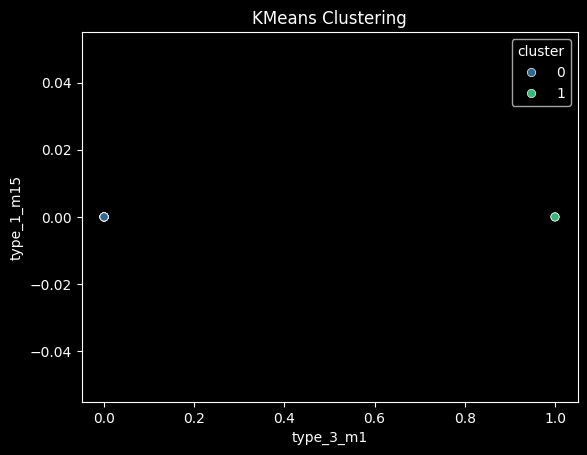

In [738]:
def plot_clustering_and_data(df, features, n_clusters=3):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Initialize the model
    kmeans = KMeans(n_clusters=n_clusters)

    # feartures are binary, subtract the mean row vector to center the data
    
    mean_row_vector = df[features].mean()
    X = df[features] - mean_row_vector
    
    print(mean_row_vector)
    print(X)
    
    # Fit the model
    kmeans.fit(X)
    
    # Get the cluster assignments
    df['cluster'] = kmeans.labels_
    
    # Plot the clusters
    sns.scatterplot(data=df, x=features[0], y=features[1], hue='cluster', palette='viridis')
    plt.title('KMeans Clustering')
    
    

plot_clustering_and_data(full_df, features=['type_3_m1', 'type_1_m15', 'type_1_m5'], n_clusters=2)

Silhouette Score: 0.16
Cluster Mean RRs:
cluster
0    6.780000
1    1.918571
2   -1.050000
Name: rr, dtype: float64



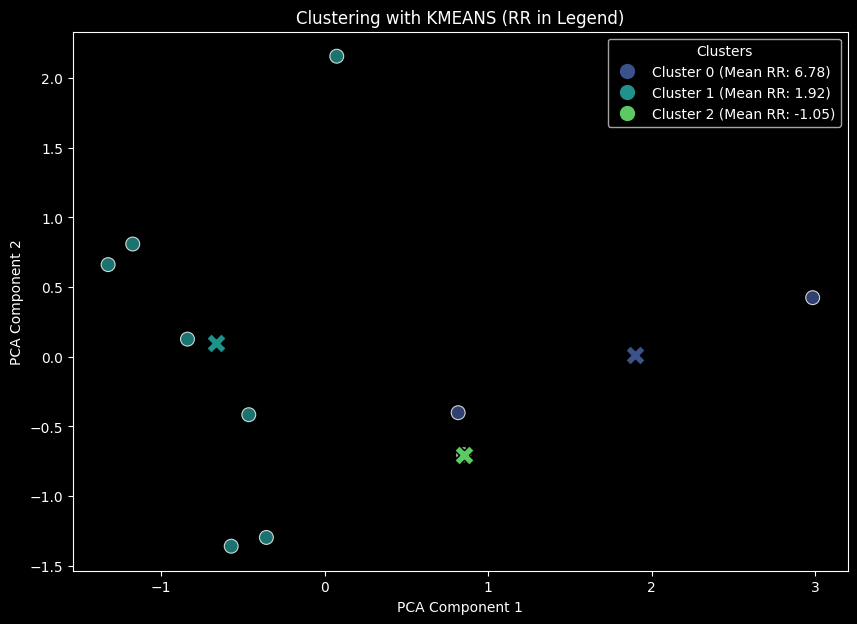

In [746]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

def plot_clustering_with_rr_in_legend(df, features, clustering_algo='kmeans', n_clusters=3):
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    
    # Apply PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Choose clustering algorithm
    if clustering_algo == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    else:
        raise ValueError("Only 'kmeans' is currently supported.")
    
    # Fit and predict clusters
    df['cluster'] = model.fit_predict(X)
    centroids = model.cluster_centers_
    centroids_pca = pca.transform(centroids)
    
    # Compute cluster mean RR
    cluster_rr_means = df.groupby('cluster')['rr'].mean()
    
    # Silhouette Score
    score = silhouette_score(X, df['cluster'])
    print(f"Silhouette Score: {score:.2f}")
    print(f"Cluster Mean RRs:\n{cluster_rr_means}\n")
    
    # Define a color palette
    palette = sns.color_palette("viridis", as_cmap=False, n_colors=n_clusters)
    
    # Plot clusters in 2D PCA space
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette=palette, s=100, alpha=0.8, legend=False
    )
    
    # Plot cluster centroids
    for idx, (x, y) in enumerate(zip(centroids_pca[:, 0], centroids_pca[:, 1])):
        plt.scatter(x, y, color=palette[idx], s=200, marker='X', edgecolors='black', zorder=5)
    
    # Add custom legend with cluster mean RRs
    legend_handles = [
        mlines.Line2D(
            [], [], color=palette[idx], marker='o', linestyle='', markersize=10,
            label=f"Cluster {idx} (Mean RR: {mean_rr:.2f})"
        )
        for idx, mean_rr in cluster_rr_means.items()
    ]
    plt.legend(handles=legend_handles, title="Clusters", loc="upper right")
    
    plt.title(f'Clustering with {clustering_algo.upper()} (RR in Legend)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Feature selection
selected_features = ['rr', 'return_points', 'initial_risk_reward', 'type_1_m15', 'type_3_m1']
plot_clustering_with_rr_in_legend(full_df, features=selected_features, clustering_algo='kmeans', n_clusters=3)


In [757]:
correlation_matrix = full_df[['rr','SL_distance', 'TP_distance', 'type_3_m1', 'type_1_m15']].corr()
print(correlation_matrix['type_3_m1'].sort_values(ascending=False))


type_3_m1      1.000000
rr             0.144047
TP_distance   -0.172186
SL_distance   -0.327327
type_1_m15          NaN
Name: type_3_m1, dtype: float64


In [760]:
df = full_df[['rr', 'SL_distance', 'TP_distance', 'type_3_m1', 'type_1_m15']]
df.cov()


,rr,SL_distance,TP_distance,type_3_m1,type_1_m15
rr,20.286471,0.000487,-0.002927,0.273556,0.0
SL_distance,0.000487,0.000023,0.000129,-0.000667,0.0
TP_distance,-0.002927,0.000129,0.000931,-0.002215,0.0
type_3_m1,0.273556,-0.000667,-0.002215,0.177778,0.0
type_1_m15,0.000000,0.000000,0.000000,0.000000,0.0


In [761]:
df.var()

rr             20.286471
SL_distance     0.000023
TP_distance     0.000931
type_3_m1       0.177778
type_1_m15      0.000000
dtype: float64

In [769]:
corr = df.cov() / np.outer(df.std(), df.std())
corr

,rr,SL_distance,TP_distance,type_3_m1,type_1_m15
rr,1.000000,0.022369,-0.021300,0.144047,NaN
SL_distance,0.022369,1.000000,0.873780,-0.327327,NaN
TP_distance,-0.021300,0.873780,1.000000,-0.172186,NaN
type_3_m1,0.144047,-0.327327,-0.172186,1.000000,NaN
type_1_m15,NaN,NaN,NaN,NaN,NaN


In [766]:
df.corr()

,rr,SL_distance,TP_distance,type_3_m1,type_1_m15
rr,1.000000,0.022369,-0.021300,0.144047,NaN
SL_distance,0.022369,1.000000,0.873780,-0.327327,NaN
TP_distance,-0.021300,0.873780,1.000000,-0.172186,NaN
type_3_m1,0.144047,-0.327327,-0.172186,1.000000,NaN
type_1_m15,NaN,NaN,NaN,NaN,NaN


In [781]:
df.cov() / np.outer(df.std(), df.std())

,rr,SL_distance,TP_distance,type_3_m1,type_1_m15
rr,1.000000,0.022369,-0.021300,0.144047,NaN
SL_distance,0.022369,1.000000,0.873780,-0.327327,NaN
TP_distance,-0.021300,0.873780,1.000000,-0.172186,NaN
type_3_m1,0.144047,-0.327327,-0.172186,1.000000,NaN
type_1_m15,NaN,NaN,NaN,NaN,NaN


In [804]:
a =np.outer([0,1,2], [2,3,4,5,6])
a

array([[ 0,  0,  0,  0,  0],
       [ 2,  3,  4,  5,  6],
       [ 4,  6,  8, 10, 12]])

In [800]:
d= np.ravel(np.outer([0,1,2], [2,3,4,5,6]))
d

array([ 0,  0,  0,  0,  0,  2,  3,  4,  5,  6,  4,  6,  8, 10, 12])

In [807]:
a.reshape(1,-1)

array([[ 0,  0,  0,  0,  0,  2,  3,  4,  5,  6,  4,  6,  8, 10, 12]])

In [803]:
orig= d.reshape(1,-1)
orig

array([[ 0,  0,  0,  0,  0,  2,  3,  4,  5,  6,  4,  6,  8, 10, 12]])

In [813]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [809]:
x.ravel()

array([1, 2, 3, 4, 5, 6])

In [810]:

x.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [812]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [821]:
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
# Sample data
group1 = [1, 2, 3, 4, 5]
group2 = [2, 3, 4, 5, 6]

# Sample data
X = [1, 2, 3, 4, 5]
Y = [5, 4, 3, 2, 1]

t_stat, p_value = ttest_ind(group1, group2)
corr, p_value = pearsonr(group1, group2)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")



# Perform a two-tailed t-test
t_stat, p_value = ttest_ind(X, Y)

# Compute correlation and p-value
corr, p_value = pearsonr(X, Y)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Correlation: {corr}")
print(f"P-Value: {p_value}")


from scipy.stats import chi2_contingency

# Contingency table
data = [[10, 20], [20, 40]]

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")



T-Statistic: -1.0
P-Value: 0.0
T-Statistic: 0.0
P-Value: 0.0
Correlation: -1.0
P-Value: 0.0
Chi-Square Statistic: 0.0
P-Value: 1.0
